# Image classification


https://www.tensorflow.org/tutorials/images/classification

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/images/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/images/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/images/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

# cats vs dogs Classification

tf.keras.Sequential모델 사용  
tf.keras.preprocessing.image.ImageDataGenerator로 데이터 로드

### 기본 기계 학습 워크 플로우
 - 데이터 검사 및 이해
 - 입력 파이프 라인 구축
 - 모델 구축
 - 훈련
 - 모델 테스트
 - 모델 개선 및 프로세스 반복

## Import packages

Import Tensorflow and the Keras classes needed to construct our model.

In [4]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

## Load data

#### Dogs vs Cats dataset(https://www.kaggle.com/c/dogs-vs-cats/data) from Kaggle.

In [6]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68608000/68606236 [==============================] - 6s 0us/step


The dataset has the following directory structure:

<pre>
<b>cats_and_dogs_filtered</b>
|__ <b>train</b>
    |______ <b>cats</b>: [cat.0.jpg, cat.1.jpg, cat.2.jpg ....]
    |______ <b>dogs</b>: [dog.0.jpg, dog.1.jpg, dog.2.jpg ...]
|__ <b>validation</b>
    |______ <b>cats</b>: [cat.2000.jpg, cat.2001.jpg, cat.2002.jpg ....]
    |______ <b>dogs</b>: [dog.2000.jpg, dog.2001.jpg, dog.2002.jpg ...]
</pre>

After extracting its contents, assign variables with the proper file path for the training and validation set.

In [7]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [8]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

## Understand the data

cats and dogs images 개수확인(training and validation directory)

In [9]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [10]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


변수 선언

In [11]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

## Data preparation

pre-processing (`ImageDataGenerator` )

1. train data 디렉토리에서 이미지 read (`flow_from_directory`)
2. 이미지를 2차원 형태로 변환
3. 부동 소수점 텐서로 변환
4. 텐서를 0에서 255 사이의 값을 0에서 1 사이의 값으로 재조정


In [13]:
#`mageDataGenerator 생성
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [14]:
 #train data 디렉토리에서 이미지 read
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [15]:
 #validation data 디렉토리에서 이미지 read
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


## Visualize training images

Visualize the training images by extracting a batch of images from the training generator—which is 32 images in this example—then plot five of them with `matplotlib`.

In [13]:
#next함수는 데이터 세트에서 배치를 반환
#next함수 의 반환 값 (x_train, y_train), x_train : 학습 특징(taining features), y_train (라벨) 

#train_data_gen에서 batch size만큼 학습이미지만 사용

sample_training_images, _ = next(train_data_gen)

In [14]:
# 이미지 plot (1줄에 5개 출력)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

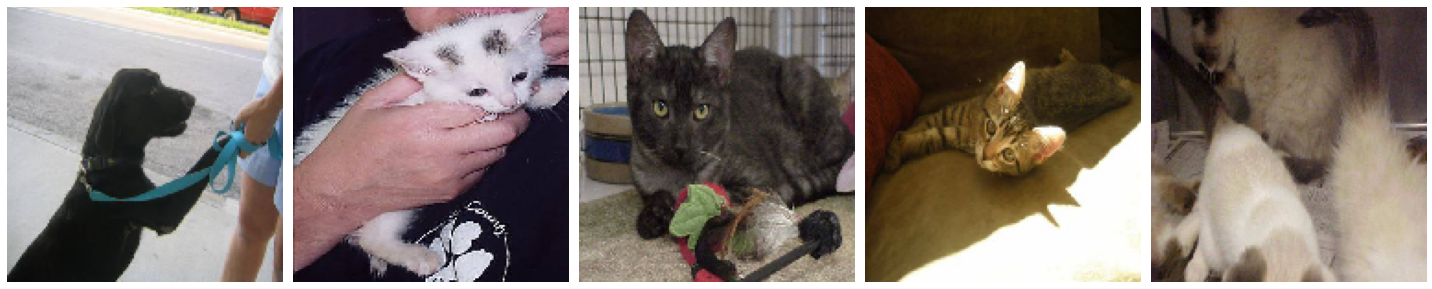

In [15]:
plotImages(sample_training_images[:5])

## Create the model

- 3개의 convolution blocks (activation function:relu)
- max pool layer  
- fully connected layer (512 , `relu` activation function) 

In [18]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

## Compile the model

#### 모델에 필요한 알고리즘 설정

- 최적화 프로그램(adam)
- 이진 교차 엔트로피 손실 함수(binary cross entropy)
- 유효성 검사 정확도 (accuracy)

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Model summary

#### 네트워크의 모든 계층을 확인 

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

## Train the model

#### fit_generator방법을 사용하 네트워크를 학습

In [20]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
15/15 [==============================] - 27s 2s/step - loss: 1.0176 - accuracy: 0.4941 - val_loss: 0.6907 - val_accuracy: 0.4978
Epoch 2/15
15/15 [==============================] - 26s 2s/step - loss: 0.6893 - accuracy: 0.5005 - val_loss: 0.6851 - val_accuracy: 0.4978
Epoch 3/15
15/15 [==============================] - 27s 2s/step - loss: 0.6692 - accuracy: 0.5459 - val_loss: 0.6447 - val_accuracy: 0.5915
Epoch 4/15
15/15 [==============================] - 26s 2s/step - loss: 0.6336 - accuracy: 0.5844 - val_loss: 0.6410 - val_accuracy: 0.6641
Epoch 5/15
15/15 [==============================] - 27s 2s/step - loss: 0.6196 - accuracy: 0.6170 - val_loss: 0.6247 - val_accuracy: 0.6819
Epoch 6/15
15/15 [==============================] - 27s 2s/step - loss: 0.5610 - accuracy: 0.6948 - val_loss: 0.5793 - val_accuracy: 0.7132
Epoch 7/15
15/15 [==============================] - 27s 2s/step - loss: 0.5756 - accuracy: 0.7041 - val_loss: 0.6122 - val_accuracy: 0.6250
Epoch 8/15
15/15 [==

## Visualize training results

#### 네트워크 학습후 결과를 시각화

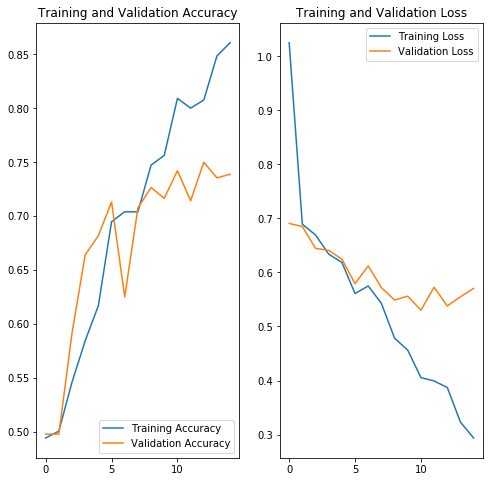

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Overfitting

훈련 정확도는 시간이 지남에 따라 선형 적으로 증가하는 반면, 검증 정확도는 훈련 과정에서 약 70 % 감소 (overfitting, 과적합 )  

과적합 : 적은 수의 학습 샘플로 학습된 모델은 새로운 샘플에서 모델의 성능에 부정적인 영향을 주는 정도로 학습된 경우  

#### 훈련 과정에서 과적합을 피할 수 있는  방법 필요 
- Data augmentation :  데이터를 보강
- Dropout : 가중치가 큰값을 제거하는 방법  